<a href="https://colab.research.google.com/github/Pranavla/Employee_Attrition_Prediction_Model/blob/main/Employee_Attrition_Prediction__Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

# **Importing the dataset**

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

Finding the rows and column number of the dataset

In [ ]:
df.shape

(1470, 35)

Taking a breif numerical data understanding about the datset

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Checking the null values

In [ ]:
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

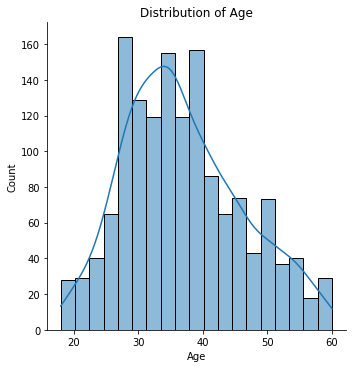

In [ ]:
sns.displot(df['Age'], kde = True)
plt.title('Distribution of Age')
plt.show()

# **Data Visualization**

In [ ]:
# Filtering the data to show only "Yes" values in the "Attrition" column
attrition_data = df[df['Attrition'] == 'Yes']

# Calculate the count of attrition by department
attrition_by = attrition_data.groupby(['Department']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['Department'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Department', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [ ]:
attrition_by = attrition_data.groupby(['EducationField']).size().reset_index(name='Count')

# Create a donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['EducationField'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Educational Field', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

In [ ]:
attrition_by = attrition_data.groupby([
    'YearsAtCompany']).size().reset_index(
        name = 'Count')

#Donut chart
fig = go.Figure(data=[go.Pie(
    labels=attrition_by['YearsAtCompany'],
    values=attrition_by['Count'],
    hole=0.4,
    marker=dict(colors=['#3CAEA3', '#F6D55C']),
    textposition='inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years at Company', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

Most of the employees leaving the organization after completing a year

Let's find out the percentage of attrition by the number of years since last promotion

In [ ]:
attrition_by = attrition_data.groupby(['YearsSinceLastPromotion']).size().reset_index(name = 'Count')

#Donut chart
fig = go.Figure(data=[go.Pie(
    labels = attrition_by['YearsSinceLastPromotion'],
    values = attrition_by['Count'],
    hole = 0.4,
    marker = dict(colors = ['#3CAEA3','#F6D55C']),
    textposition = 'inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Years Since Last Promotion', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

Percentage of attrition with gender

In [ ]:
attrition_by = attrition_data.groupby(['Gender']).size().reset_index(name='Count')

#Donut chart
fig = go.Figure(data=[go.Pie(
    labels = attrition_by['Gender'],
    values = attrition_by['Count'],
    hole = 0.4,
    marker = dict(colors =['#F6D55C','#3CAEA3']),
    textposition = 'inside'
)])

# Update the layout
fig.update_layout(title='Attrition by Gender', font=dict(size=16), legend=dict(
    orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1
))

# Show the chart
fig.show()

From the above fig it is understandable that men have a high attrition rate compared to women. Let's find out the relationship between monthly income and the age of the employees

In [ ]:
fig = px.scatter(df, x="Age", y="MonthlyIncome", color="Attrition", trendline="ols")
fig.update_layout(title="Age vs. Monthly Income by Attrition")
fig.show()

From the above figure we can understand that their is high rate of attrition amoung the employees with low monthly incomes.

# **Creating the Model**

There are a number of categorical values in the dataset.So, all those vallues are converting to numericals.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
df['BusinessTravel'] = le.fit_transform(df['BusinessTravel'])
df['Department'] = le.fit_transform(df['Department'])
df['EducationField'] = le.fit_transform(df['EducationField'])
df['Gender'] = le.fit_transform(df['Gender'])
df['JobRole'] = le.fit_transform(df['JobRole'])
df['MaritalStatus'] = le.fit_transform(df['MaritalStatus'])
df['Over18'] = le.fit_transform(df['Over18'])
df['OverTime'] = le.fit_transform(df['OverTime'])

Checking the correlation

In [ ]:
correlation = df.corr()
print(correlation["Attrition"].sort_values(ascending=False))

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
A

Let's add a new column for the dataset, which is satisfaction score. 

In [ ]:
df['SatisfactionScore'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction']

# Splitting the dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.drop(['Attrition'], axis=1)
y = df['Attrition']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
xtrain

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SatisfactionScore
554,27,2,975,1,7,3,3,1,764,4,...,80,0,9,2,1,7,6,0,7,6
672,42,2,462,2,14,2,3,1,936,3,...,80,0,10,6,3,5,4,0,3,7
1360,31,2,471,1,4,3,3,1,1916,1,...,80,1,4,0,2,2,2,2,2,6
669,39,2,1122,1,6,3,3,1,932,4,...,80,0,8,2,1,2,2,2,2,9
905,29,2,694,1,1,3,1,1,1264,4,...,80,2,9,2,2,7,7,1,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,2,750,1,28,3,1,1,1596,2,...,80,2,10,3,2,10,9,6,8,9
1294,41,2,447,1,5,3,1,1,1814,2,...,80,0,11,3,1,3,2,1,2,5
860,22,1,1256,1,3,4,1,1,1203,3,...,80,1,1,5,3,0,0,0,0,9
1459,29,2,1378,1,13,2,4,1,2053,4,...,80,1,10,2,3,4,3,0,3,7


In [ ]:
print(xtrain.columns)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SatisfactionScore'],
      dtype='object')


# Testing the accuracy of the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
accuracy = accuracy_score(ytest, ypred)
print("Accuracy:", accuracy)

Accuracy: 0.8718446601941747


# **Conclusion**

Employee attrition Prediction Model is a powerful tool that can provide organizations with valuable insights into their workforce and help them make data-driven decisions to improve retention, reduce turnover, and enhance organizational performance. By leveraging the power of machine learning and data analytics, organizations can gain a competitive advantage in today's increasingly complex and competitive business environment.

One of the key benefits of employee attrition prediction model is that it can help organizations develop strategies to reduce employee turnover rates and retain high-performing employees. By identifying the most important factors that lead to employee attrition, organizations can take steps to address these issues, such as improving employee engagement, providing more opportunities for professional development, and offering competitive compensation and benefits packages.

Follow me on

LinkedIn: https://www.linkedin.com/in/pranav-lal-v-r-3320191b2

GitHub: https://github.com/Pranavla

Medium blog : https://medium.com/@pranavlal568